# Learning from Data: Workshop 2

| Date set     | Hand-in date |
|:------------------|:-----------------------------------|
|22nd January 2015  | **12:00 Thursday 11th February 2015** |


This workshop is worth 8% of the total module mark.


Note that both paper (BART) and electronic submissions are required.  Submit a paper copy of your notebook to the Student Services Office and an electronic copy via the  [electronic hand-in system](http://empslocal.ex.ac.uk/submit/).


Candidate number: ** **  




Your report should consist of your IPython notebook showing what you did, what was the
result, and what you can conclude from the exercise. Each report will be
assessed on the following criteria:

* Does it record what was done in the exercise?
* Does it permit the results to be reproduced?
* How does the work relate to the theoretical foundations discussed in lectures?
* Is it well presented?

### Submitting the reports
You should convert your notebook to printable form, either by downloading it as LaTeX and thence PDF or by printing it directly (see the File menu).  If you use colour make sure that you print in colour or the figures can be easily understood in black and white.

Reports should be handed-in to the Student Services Office with the BART coversheet.  You should also submit the notebook electronically at  <http://empslocal.ex.ac.uk/submit/>.  You just need to submit the single file that is the notebook, so you should be able to upload it directly from the directory on the Blue Room machine.  If you're not sure where in your homespace it is, type <code>pwd</code> (print working directory) in a cell to find out where the notebooks are.


> Although you will undoubtedly work collaboratively in the workshops themselves, these are *individual* exercises.  The reports you write should be about the results *you* obtained, and your attention is drawn to the College and University guidelines on collaboration and plagiarism. 

In [959]:
%pylab inline
figsize(8,8)

Populating the interactive namespace from numpy and matplotlib


## Classification with k-nearest neighbours

In this section of the workshop you will use a k-nearest neighbours classifier to first classify some two-dimensional data that can be easily plotted.  After that we'll try it on a more complicated dataset.

First download and plot some data

In [960]:
import wget
import operator

try: 
    X = loadtxt('raw-tremor.txt')
except IOError:
    wget.download('http://empslocal.ex.ac.uk/~reverson/ECM3420/raw-tremor.txt')
    X = loadtxt('raw-tremor.txt')
print(X.shape)

(357, 3)


In [961]:
t = X[:,2]
X = X[:,:2]
print(t.shape, X.shape)

(357,) (357, 2)


Plot the data according to the labels

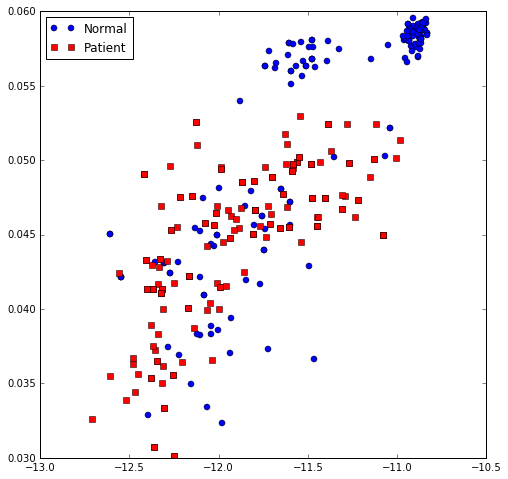

In [962]:
normal = t == 1
patient = t == 0
plot(X[normal,0], X[normal,1], 'bo', label='Normal')
plot(X[patient,0], X[patient,1], 'rs', label='Patient')
legend(loc=2)

This data is a scaled version of the tremor data. Plot it and note the disparity in the sizes of the data.

### Mean and standard deviation

Find the mean (centroid) and standard deviation of the features as a whole and also for each of the classes. Check that the mean and standard
  deviation make sense in terms of your scatter plot.  You could plot the location of the centroid on the scatter plot.

Data mean: [-11.62216853   0.04892984]
Data standard deviation: [ 0.54510484  0.00777128]
	
Normal data mean: [-11.34656154   0.05323007]
Normal data standard deviation: [ 0.52683581  0.00757679]
	
Patient data mean: [-11.89623581   0.04465364]
Patient data standard deviation: [ 0.4073886   0.00516589]


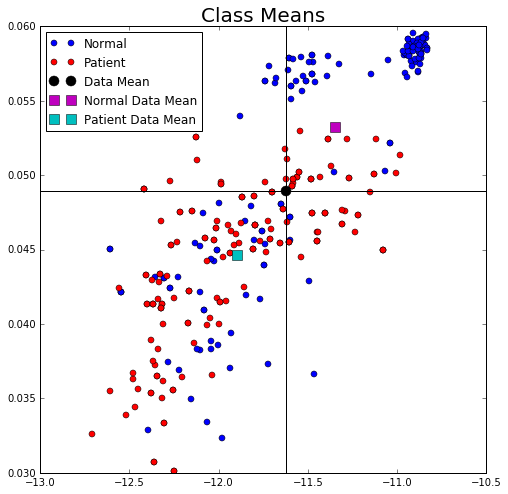

In [963]:
xbar = mean(X, axis=0)
xbarnormal = mean(X[normal,:], axis=0)
xbarpatient = mean(X[patient,:], axis=0)
xstd = std(X, axis=0)
xstdnormal = std(X[normal,:], axis=0)
xstdpatient = std(X[patient,:], axis=0)

fig = figure()
ax1 = fig.add_subplot(111)
ax1.plot(X[normal,0], X[normal,1], 'bo', label='Normal')
ax1.plot(X[patient,0], X[patient,1], 'ro', label='Patient')
ax1.plot(xbar[0], xbar[1], 'ko', label='Data Mean', ms = 10)
ax1.plot(xbarnormal[0], xbarnormal[1], 'ms', label='Normal Data Mean', ms = 10)
ax1.plot(xbarpatient[0], xbarpatient[1], 'cs', label='Patient Data Mean', ms = 10)



# Plotting the centroid for the standardised Data. 
axhline(y=mean(X[:, 1], axis = 0), color = 'black', hold=None)
axvline(x=mean(X[:, 0], axis = 0), color = 'black', hold=None)

legend(loc=2)
title('Class Means', fontsize = 20)

print('Data mean:', xbar)
print('Data standard deviation:', xstd)
print('\t')
print('Normal data mean:', xbarnormal)
print('Normal data standard deviation:', xstdnormal)
print('\t')
print('Patient data mean:', xbarpatient)
print('Patient data standard deviation:', xstdpatient)


><h2> Data description </h2> 
><font color = "black" size = "3"> There is a clear disparity between the normal and patient data classes visible. While most of samples that are unaffected by the disease (normal) are concentrated in the upper right corner, the data of affected patients (patient) occupies a much wider range, clustered around the center of the plot. This distinction is clearly supported by the means of both classes, with the mean of the normal data in the top right quadrant of the centroid and the mean of the patient data in the bottom left quadrant of the centroid.  </font>

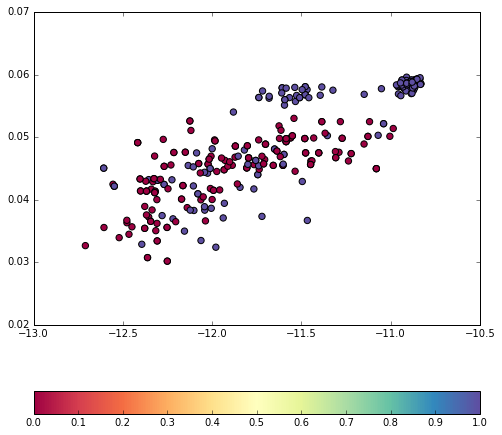

In [964]:
# An alternative way of plotting that colours the markers according to the value of t
scatter(X[:,0], X[:,1], s=40, c=t, cmap=cm.Spectral)
colorbar(orientation='horizontal')

Make sure you understand the way the above works.  Print the values of the variables is you're not sure and use help etc to find out about plot and scatter.

### Covariance 

Use the Python command <code>cov</code> to return the covariance matrix.  Check that the diagonal entries are what you expect from the standard deviations.

In [965]:
# Calculating the covariance matrix for the tremor data. 
cov_matrix = cov(X.T)
print(cov_matrix)

# Checking whether the diagonal (variance) of the variance-covariance matrix is equal
# to the variance of the data calculated directly. 
assert allclose(diag(cov_matrix, 1).all(), ((xstd)**2).all())

print('\t')
print(xstd**2)

[[  2.97973950e-01   3.57549241e-03]
 [  3.57549241e-03   6.05623797e-05]]
	
[  2.97139289e-01   6.03927372e-05]


> <font color = "black" size = "3"> The diagonal of the covariance matrix should be approximately equal to the variance of the two features. </font>

Write a loop to calculate the covariance matrix by hand:
\begin{align*}
   S_{ij} = \frac{1}{N-1}\sum_{n=1}^N (x_{ni} - \bar{x}_{i})(x_{nj} - \bar{x}_{j})
\end{align*}
for each $i$ and $j$.

Check that you get the same result using both methods.

In [966]:
# This method calculates the covariance matrix of a given two dimensional data set.
def getCovariance(data):
    N = len(data)
    i = 0
    j = 1
    
    new_mean = mean(data, axis=0)
    vcov_matrix = empty([2, 2], dtype = float)
    
    for n in range(N):
        vcov_matrix[1, 0] += (data[n,i] - new_mean[0])*(data[n,j] - new_mean[1])
        vcov_matrix[0, 0] += (data[n,i] - new_mean[0])*(data[n,i] - new_mean[0])
        vcov_matrix[1, 1] += (data[n,j] - new_mean[1])*(data[n,j] - new_mean[1])

    vcov_matrix[0, 1] = vcov_matrix[1, 0]
    vcov_matrix = vcov_matrix/(N-1)
    return vcov_matrix

# Here, we are comparing the variance covariance matrix returned from the getCovariance method
# with numpy´s cov method. 
print("Numpy covariance function: \t")
print(cov_matrix)
print("Covariance generated by for-loop: \t")
print(getCovariance(X))

Numpy covariance function: 	
[[  2.97973950e-01   3.57549241e-03]
 [  3.57549241e-03   6.05623797e-05]]
Covariance generated by for-loop: 	
[[  2.97973950e-01   3.57549241e-03]
 [  3.57549241e-03   6.05623797e-05]]


><font color = "black" size = "3">As expected, both methods give the **exact** same result. </font>

### Standardisation

Standardise the data by mean-centring it and dividing by the
standard deviation of the relevant variable. (You can use the commands
<code>mean</code> and <code>std</code> to find the mean and standard deviation.)
Plot the standardised data
and check your result by finding its mean and covariance matrix. 



Covariance matrix:
[[ 1.00280899  0.84404085]
 [ 0.84404085  1.00280899]]


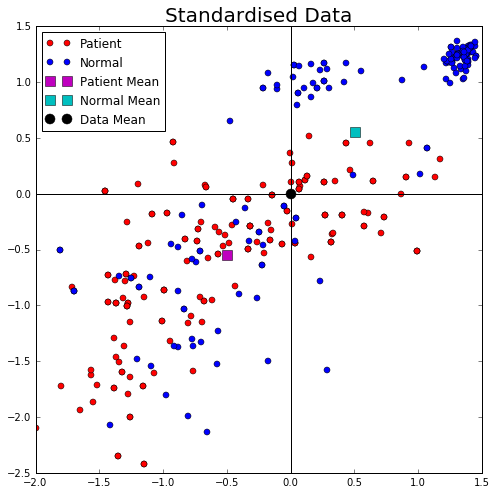

In [967]:
my_std = std(X, axis = 0)
my_mean = mean(X, axis = 0)

# Standardising the data
st_data = (X - my_mean)/my_std

# Calculating the mean of the standardised data. 
st_data_mean = mean(st_data, axis = 0)

# Calculating the mean for both classes. 
patient_mean = mean(st_data[patient,], axis = 0)
normal_mean = mean(st_data[normal,], axis = 0)

# Creating the variance covariance matrix for the standardised data. 
my_varcov = cov(st_data.T)
print('Covariance matrix:')
print(my_varcov)

# Plotting 
fig = figure()

ax1 = fig.add_subplot(111)
title('Standardised Data', fontsize=20)
ax1.plot(st_data[patient, 0], st_data[patient, 1],'ro', label='Patient')
ax1.plot(st_data[normal, 0], st_data[normal, 1],'bo', label='Normal')
ax1.plot(patient_mean[0], patient_mean[1],'ms', label='Patient Mean', ms = 10)
ax1.plot(normal_mean[0], normal_mean[1],'cs', label='Normal Mean', ms = 10)

# Plotting the centroid of the data. 
axhline(y= st_data_mean[0], xmin=-2.5, xmax=1.5, hold=None, color='black')
axvline(x= st_data_mean[1], ymin=-2, ymax=1.5, hold=None, color='black')
ax1.plot(st_data_mean[0], st_data_mean[1], 'ko', label='Data Mean', ms = 10)

ax1.legend(loc = 2)


><font color = "black" size = "3">While the physical distribution of the data has not change, it is now centered around a mean of zero and standard deviation is close to unity.  </font>

Find the
correlation between the two variables $x_1$ and $x_2$ from the standardised
covariance matrix.  You can use  <code>corrcoef</code> to check your results, but you should be able to read it from the covariance matrix of the standardised data.

In [968]:
# Getting the covariance of the variables x1 and x2 from the diagonal of the variance covariance matrix.
print("Variance of the standardised data from the diagonal of the variance covariance matrix:")
print(diag(my_varcov))
# Getting the correlation coefficients (correlation matrix) of the standardised data. 
corr_matrix = corrcoef(st_data[:, 0], st_data[:, 1])
print('Correlation matrix calculated with numpy´s corrcoef function:')
print(corr_coefficient)

# Calculating the variance-covariance matrix from the standardised data. 
# Since the correlation matrix is calculated by dividing the covariance by the product of the sqare root of the variance 
# of the two variabels we can simply optain the variance from the covariance matrix and devide it by the square root of it.
# Hence, if the covariance matrix is correct, this procedure should generate the same result. 
product = sqrt(diag(my_varcov)[0])*sqrt(diag(my_varcov)[1])
# Checking whether this is true. 
assert allclose(cov_st/product, corr_matrix)
print('Correlation matrix calculated from the variance covariance matrix:')
print(cov_st/product)

Variance of the standardised data from the diagonal of the variance covariance matrix:
[ 1.00280899  1.00280899]
Correlation matrix calculated with numpy´s corrcoef function:
[[ 1.          0.84167659]
 [ 0.84167659  1.        ]]
Correlation matrix calculated from the variance covariance matrix:
[[ 1.          0.84167659]
 [ 0.84167659  1.        ]]


><font color = "black" size ="3"> The diagonal of the variance covariance matrix shows the variance of each variable x1 and x2. Since we have a standardised data set with a mean of zero we expect the variance to be close to unity. Furthermore we can calculate the correlation matrix from this variance as follows: </font>

\begin{align*}
   Correlation_{x_1x_2} = \frac{cov_{{x_1}{x_2}}}{\sqrt{cov_{{x_1}{x_1}}}\sqrt{cov_{{x_2}{x_2}}}}
\end{align*}
><font color = "black" size ="3">The correlation is calculated by taking the covariance of the two features and dividing it by the product of the covariances of each feature. Since this method generates a the exact same matrix as numpy´s corrcoef our variance covariance matrix is correct.</font>

## k-nearest neighbour classifier

Now use a k-nn classifier to classify the *raw* data.  You will have to divide the data into a training and a test set.  You can use the k-nn classifier from the <code>sklearn</code> module as follows.

In [969]:
# Divide the data into training and test sets
from numpy.random import permutation
N = X.shape[0]
I = permutation(N)   # Shuffled indices 0,..., N-1
Itr = I[:N//2]
Ite = I[N//2 + 1:]
print(Ite.shape)
Xtr = X[Itr,:]
ttr = t[Itr]

Xte = X[Ite,:]
tte = t[Ite]

(178,)


Plot your training and test sets to make sure that they look like a fair random division of the data.

The training data are to be used to construct the classifier. The test data, which should not be used a
t all during training, are used to evaluate how well the classifier works.

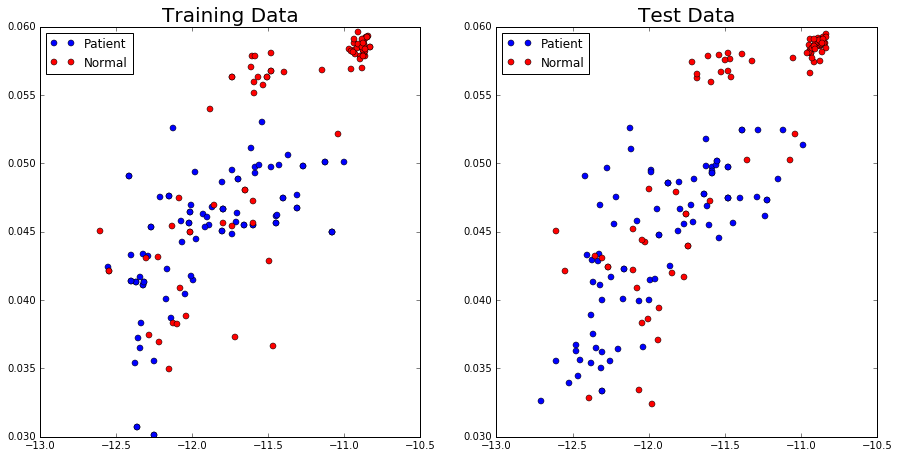

In [970]:
patient_tr = ttr == 0
normal_tr = ttr == 1

patient_te = tte == 0
normal_te = tte == 1

fig = figure(figsize=(15, 25))
ax1 = fig.add_subplot(321)
title('Training Data', fontsize = 20)
ax2 = fig.add_subplot(322)
title('Test Data', fontsize = 20)

ax1.plot(Xtr[patient_tr, 0], Xtr[patient_tr, 1],'bo', label='Patient')
ax1.plot(Xtr[normal_tr, 0], Xtr[normal_tr, 1],'ro', label='Normal')
ax1.legend(loc = 2)
ax2.plot(Xte[patient_te, 0], Xte[patient_te, 1],'bo', label='Patient')
ax2.plot(Xte[normal_te, 0], Xte[normal_te, 1],'ro', label='Normal')
ax2.legend(loc = 2)

In [971]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(Xtr, ttr)   # Train it

y = knn.predict(Xte)  # Predict the class of the testing data



Use your classifier to carry out $k=1$ classification of the
<code>Xte</code> tremor data. As you did for the previous question, plot the
training data according to its class and plot the test data according to
both its true class (from <code>tte</code>) and its predicted class from your
classifier.  Where the predicted class differs from the true class make
sure that you can see from the plot why the classifier has classified the
way it has. Work out the <i>classification accuracy</i> for your
classifier, that is the fraction of examples in <code>Xte</code> for which  the
classifier predicts the correct class.

Repeat the above for  $k = 3$ and $k = 10$ and give an explanation for
your results.   Automate the procedure to plot a graph of the
classification accuracy of <code>Xte</code> versus $k$ for $k$ up to about 40.  What's the best $k$ to use?  Why are smaller $k$ worse?  Why are larger $k$ worse?

Now plot the classification accuracy for the <i>training </i> data (that
is call your classifier like <code>knn.predict(Xtr)</code>).
Explain the shape of the curve.

Accuracy for K = 1: 80.337078651685388%
Accuracy for K = 2: 69.101123595505626%
Accuracy for K = 3: 69.101123595505626%


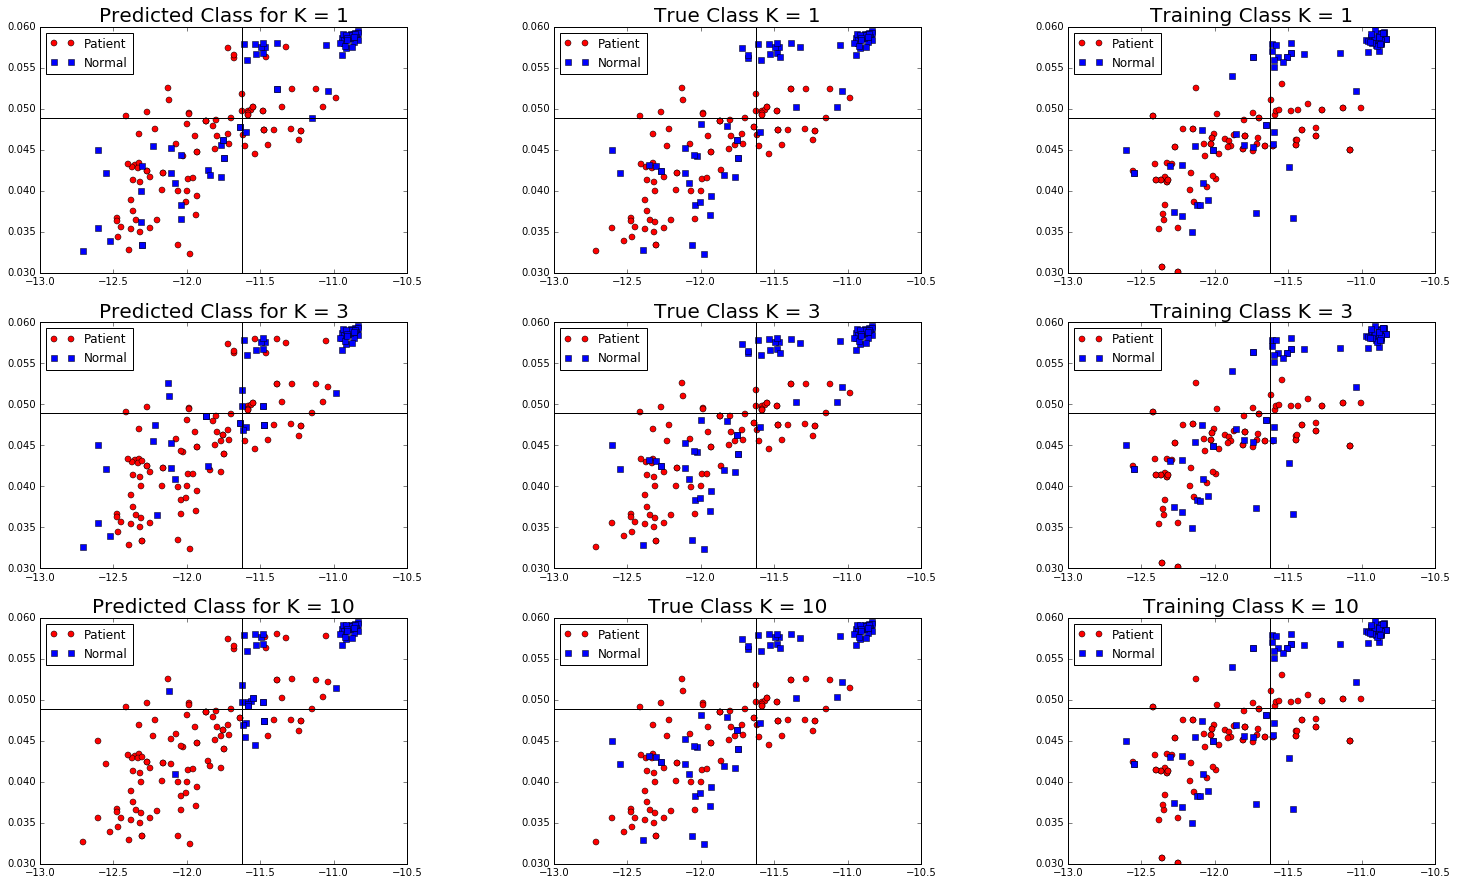

In [972]:
# Creating a helper function to calculate the prediction vactor that resutls when the K-next-neigbour classificationis performed
# This function returns a single prediction vector for a specified k. 
def getKnnPrediction(training_data, training_target, test_data, k): 
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(training_data, training_target)  
    y = knn.predict(test_data) 
    return y
# This function returns an arrays for each class containing a series of prediction vectors for a range of Ks.  
def getKnnPredictionSeries(training_data, training_target, test_data, for_nk):
    nk_nomal = []
    nk_patient = []    
    for i in range(1, for_nk + 1):
        ks = getKnnPrediction(Xtr, ttr, Xte, i)
        nk_nomal.append(ks == 1)
        nk_patient.append(ks == 0) 
    return nk_nomal, nk_patient
# This function returns the accuracy of the classifier passed into it. 
def getAccuracy(predictions, tte):
    correct = (sum(tte == predictions)/len(tte))*100
   
    return(correct)
# Here I am assembeling all functions from above to create a comparison plot, that shows the true 
# classes, the predicted classes and the training set for specified values of K. 
def compareClassifier(training_data, training_target, test_data, for_ks):
    # since the getKnnPredictionSeries functions calculates a series of Knn classifiers, going from
    # 1 to the max value of K, we need to extract it from the specification vector.
    series_of_k = max(for_ks) + 1
    # Here we are optaining two multidimensional arrays for the patients and control group that contain the prediction 
    #vectors for all Ks up to the specified maximum.
    normal_test, patient_test = getKnnPredictionSeries(training_data, training_target, test_data, series_of_k)
    # We need to subtract 1 since index[0] of the array normal_test and patient_test corespond to K = 1. Hence, the 
    #values for K = (1, 3, 10), are found at (0, 2, 9).
    for_ks = subtract(for_ks, 1)
    
    fig = figure(figsize=(25, 15))
    
    # The n is needed to aligne the plots in rows of 3. 
    n = 1
    # Here we are plotting three diagrams for each instance of K.  
    for i in range(series_of_k):
        # Checking whether the K value was specified and needs to be plotted. 
        if i in for_ks:

            ax = fig.add_subplot(3, 3, n)

            plt.subplots_adjust(wspace=0.4, hspace=0.2)
            title('Predicted Class for K = %s' %(i + 1), fontsize = 20)
            ax.plot(Xte[patient_test[i], 0], Xte[patient_test[i], 1],'ro', label='Patient')
            ax.plot(Xte[normal_test[i], 0], Xte[normal_test[i], 1],'bs', label='Normal')
            ax.legend(loc = 2)
            axhline(y=mean(Xte[:, 1], axis = 0), hold=None, color='black')
            axvline(x=mean(Xte[:, 0], axis = 0), hold=None, color='black')
            
            ax = fig.add_subplot(3, 3, n + 1)
            title('True Class K = %s' %(i + 1), fontsize = 20)
            ax.plot(Xte[patient_te, 0], Xte[patient_te, 1],'ro', label='Patient')
            ax.plot(Xte[normal_te, 0], Xte[normal_te, 1],'bs', label='Normal')
            ax.legend(loc = 2)
            axhline(y=mean(Xte[:, 1], axis = 0),  hold=None, color='black')
            axvline(x=mean(Xte[:, 0], axis = 0),  hold=None, color='black')
            
            ax = fig.add_subplot(3, 3, n + 2)
            title('Training Class K = %s' %(i + 1), fontsize = 20)
            ax.plot(Xtr[patient_tr, 0], Xtr[patient_tr, 1],'ro', label='Patient')
            ax.plot(Xtr[normal_tr, 0], Xtr[normal_tr, 1],'bs', label='Normal')
            ax.legend(loc = 2)
            axhline(y=mean(Xtr[:, 1], axis = 0),  hold=None, color='black')
            axvline(x=mean(Xtr[:, 0], axis = 0),  hold=None, color='black')
            n += 3    

# Main function. 

compareClassifier(Xtr, ttr, Xte, (1, 3, 10))

print('Accuracy for K = 1: ' + repr(getAccuracy(getKnnPrediction(Xtr, ttr, Xte, 1), tte)) + '%')
print('Accuracy for K = 2: ' + repr(getAccuracy(getKnnPrediction(Xtr, ttr, Xte, 3), tte)) + '%')
print('Accuracy for K = 3: ' + repr(getAccuracy(getKnnPrediction(Xtr, ttr, Xte, 10),tte)) + '%')


><font color = "black" size ="3"> Each row of diagrams show the predicted classes, the true classes and training classes for K = 1, 3, and 10. From the predicted classes it can be seen that as K increases the amount of people that are classified as normal decreases, especially in the bottom left quadrant of the centroid. This is due to the high occurence of patients in this area and as K increase they overweigh (swollow) the normal class. As a counter example, the top right quadrant consist almost entirely of the normal class, which explains the consisten calssification in this area as k increases. </font>

(1, 80.337078651685388)


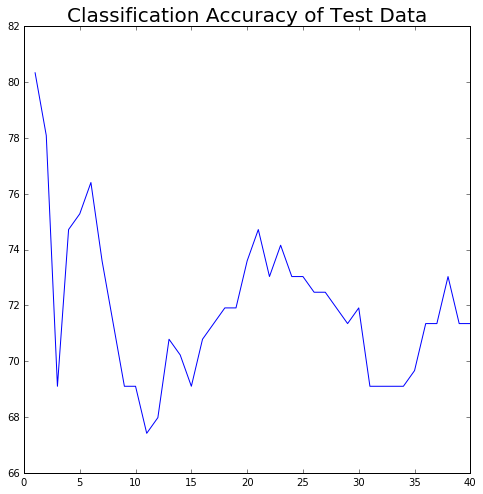

In [973]:
# This function finds the optimal Knn classifier.
def optimalKnn(accuracy_rate):
    index, value = max(enumerate(accuracy_rate), key=operator.itemgetter(1))
    return (index +1), value
# Generates the accuracy for each Knn. 
def accuracyRate(training_data, test_data, training_target, test_target, for_nk):
    accur_rate = []
    
    for i in range(1, for_nk + 1): 

        knn = KNeighborsClassifier(n_neighbors=i)
        knn.fit(training_data, training_target)
        p = knn.predict(test_data)
        accur_rate.append(getAccuracy(p, test_target))
    return accur_rate

# Plotting the accuracy rate. 
plot(arange(1 ,41, 1),accuracyRate(Xtr, Xte, ttr, tte, 40))

title("Classification Accuracy of Test Data", fontsize = 20)

print(optimalKnn(accuracyRate(Xtr, Xte, ttr, tte, 40)))

><h2> Classification accuracy rate </h2>
><font color = "black" size = "3"> It is evident that an increase in Knn decreases the effectiveness of the classifier. </font>

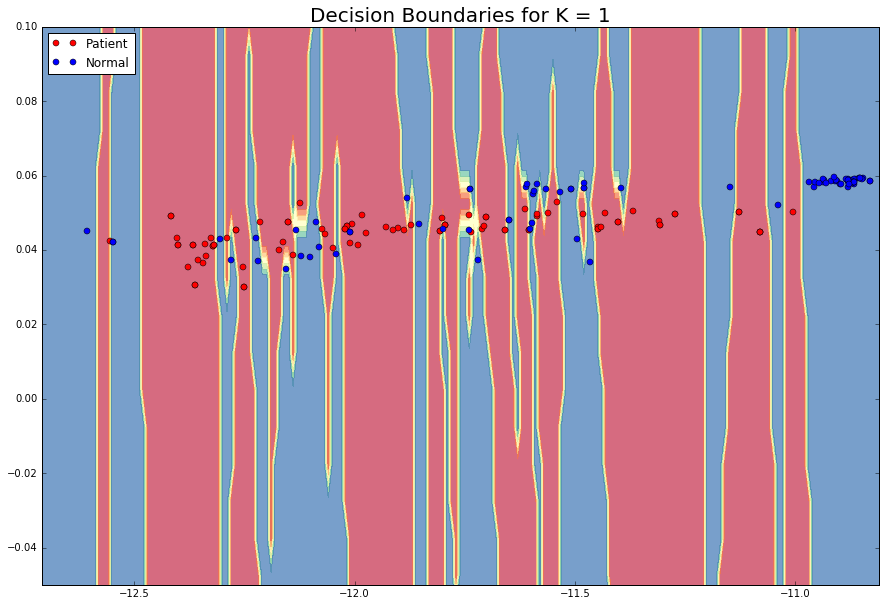

In [974]:
# Here I implemented a decision boundary plot. 
def plot_decision_boundary(training_data, test_data, train_target, test_target, k, class1, class2):
    # Set min and max values and give it some padding
    x_min, x_max = test_data[:, 0].min(), test_data[:, 0].max() +0.03
    y_min, y_max = test_data[:, 1].min() -0.3, test_data[:, 1].max() + 0.3
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(training_data, train_target)
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    #Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    fig = figure(figsize = (15, 10))
    ax = fig.add_subplot(1, 1, 1)
    ylim([-0.05,0.1])
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha = 0.7)
    
    #plt.scatter(test_data[:, 0], test_data[:, 1], c=y, cmap=plt.cm.Spectral)
    plot(training_data[class1, 0], training_data[class1, 1], 'ro', label = 'Patient')
    plot(training_data[class2, 0], training_data[class2, 1], 'bo', label = 'Normal')
    title("Decision Boundaries for K = 1", fontsize = 20)
    ax.legend(loc = 2)
    
plot_decision_boundary(Xtr, Xte, ttr, tte, 1, patient_tr, normal_tr)

><h2>Decision Boundaries Raw Data</h2>
> <font size="3"> The decision boundary plot shows the decision areas for both classes, normal and patient, using the optimal K value of one. The plotted points, which belong to the training set, show why and how the decsions are made. This is also the reason why each point is in the right coloured area. </font>

> <font size="3">Interestingly, the decision boundaries seemed to be stretched along the y-axis. This makes sense, due to the fact that both features, x1 and x2, are recoded in presumably differnent units that differ largly in scale. This effect, however, should vanish when the data is standardised or sphered.</font>

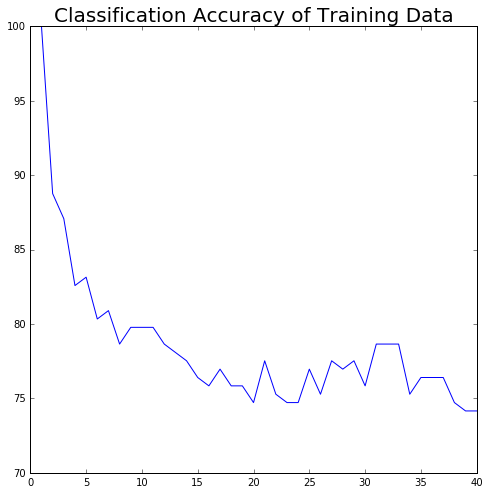

In [975]:
plot(arange(1 ,41, 1),accuracyRate(Xtr, Xtr, ttr, ttr, 40))
title("Classification Accuracy of Training Data", fontsize = 20)

><h2> What happens when the training set classifies itself? </h2>
><font color = "black" size = "3"> While the accurcy rate of the test data exhibts a high volatility caused by an increase in the number of neigbours that are taken into considereation, plotting the accuracy rate of the training data exhibits an consisten downwards trend with an accuracy rate of 100% when K is equal to one. This is a somewhat natural result as the classifier compares each point with itself creating a perfect fit when K is equal to one. However, when the number of K´s are increased more data points around the true class are taken into consideration causing the accuracy rate to deteriorate. </font>

Find the mean and standard deviations of the *training* data and use these to standardise the training data.  Use the training data mean and standard deviation to standardise the test data.  Note that it's important to use the training data statistics (rather than the test data statistics) because both data should be treated in *exactly* the same way and we might only have a single test data point to classify.

Plot your standardised data.

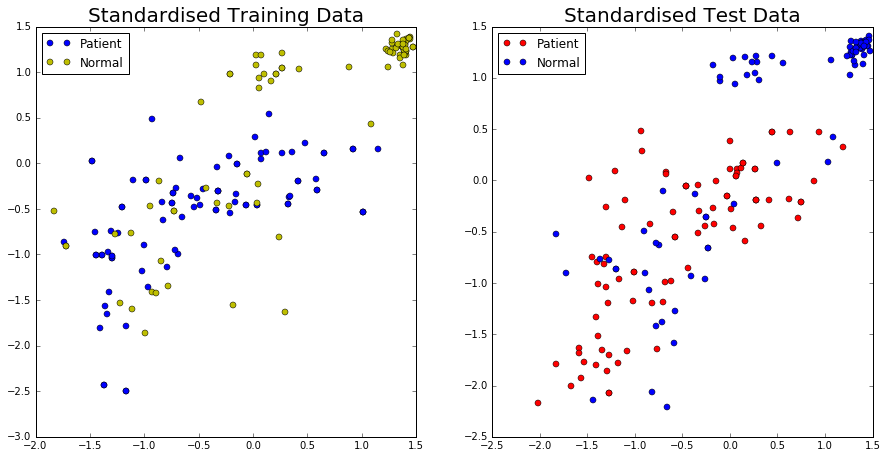

In [976]:
# Standardisin the data and plotting each class. 

xbar = mean(Xtr, axis = 0)
my_std = std(Xtr, axis = 0)

Xtr_st = (Xtr - xbar)/my_std
Xte_st = (Xte - xbar)/my_std

fig = figure(figsize=(15, 25))
ax1 = fig.add_subplot(321)
title('Standardised Training Data', fontsize = 20)
ax2 = fig.add_subplot(322)
title('Standardised Test Data', fontsize = 20)

ax1.plot(Xtr_st[patient_tr, 0], Xtr_st[patient_tr, 1],'bo', label='Patient')
ax1.plot(Xtr_st[normal_tr, 0], Xtr_st[normal_tr, 1],'yo', label='Normal')
ax1.legend(loc=2)

ax2.plot(Xte_st[patient_te, 0], Xte_st[patient_te, 1],'ro', label='Patient')
ax2.plot(Xte_st[normal_te, 0], Xte_st[normal_te, 1],'bo', label='Normal')
ax2.legend(loc=2)


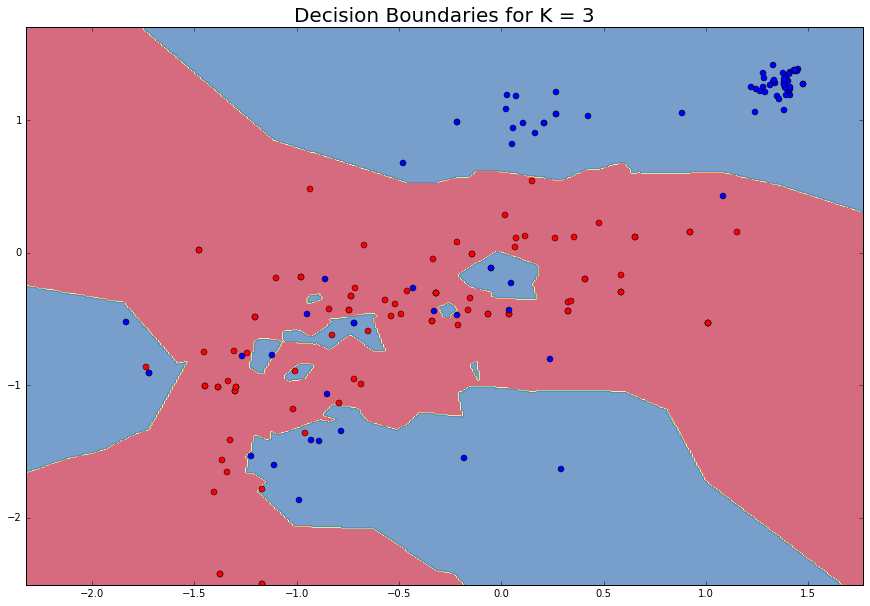

In [977]:
# Here I implemented a method that draws the decision boundaries for the standardised data.  

def plot_decision_boundary(training_data, test_data, train_target, test_target, k, class1, class2):
    # Set min and max values and give it some padding
    x_min, x_max = test_data[:, 0].min() -0.3  , test_data[:, 0].max() + 0.3
    y_min, y_max = test_data[:, 1].min() -0.3, test_data[:, 1].max() + 0.3
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(training_data, train_target)
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    #Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    fig = figure(figsize = (15, 10))
    ax = fig.add_subplot(1, 1, 1)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha = 0.7)
    
    #plt.scatter(test_data[:, 0], test_data[:, 1], c=y, cmap=plt.cm.Spectral)
    plot(training_data[class1, 0], training_data[class1, 1], 'ro', label = 'Patient')
    plot(training_data[class2, 0], training_data[class2, 1], 'bo', label = 'Normal')


plot_decision_boundary(Xtr_st,Xte_st,ttr,tte, 3, patient_tr, normal_tr)
title('Decision Boundaries for K = 3', fontsize = 20)



><h2> Decision Boundaries for Standardised Data </h2>
><font color = "black" size = "3"> Both axis are now scaled and the decsion boundaries are now exhibiting are more spherical shape. </font>

Now use the k-nn classifier to find the accuracy using the standardised data.  How does it compare with the raw data?

(1, 86.516853932584269)


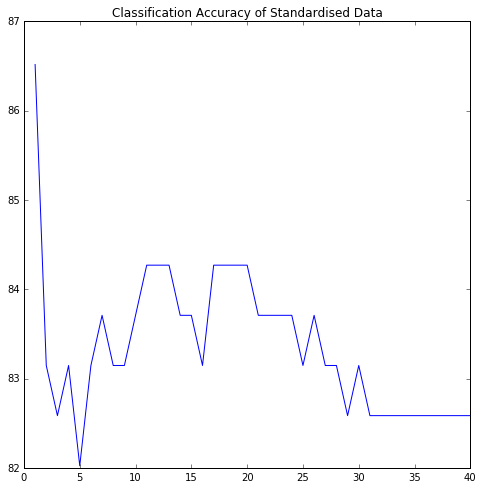

In [978]:
plot(arange(1 ,41, 1), accuracyRate(Xtr_st, Xte_st, ttr, tte, 40))
title("Classification Accuracy of Standardised Data")
print(optimalKnn(accuracyRate(Xtr_st, Xte_st, ttr, tte, 40)))

><font color = "black" size = "3"> Compared to the non-standardised data, the standardised data produces a more accurate results with an increased maximum accuracy bewtween 3% and 7%. Also, it appears that the decline in accuracy is much slower than the one of the non-standardised data. </font>

### Sphering

Sphere  the tremor data and plot it in the sphered coordinates. Compute the mean and covariance matrix of the sphered data: are they what you expect?


Mean of the sphered data:
[  7.00528959e-15  -2.74313718e-15]
Variance covariance matrix of the sphered data:
[[  1.00000000e+00  -1.29733926e-16]
 [ -1.29733926e-16   1.00000000e+00]]


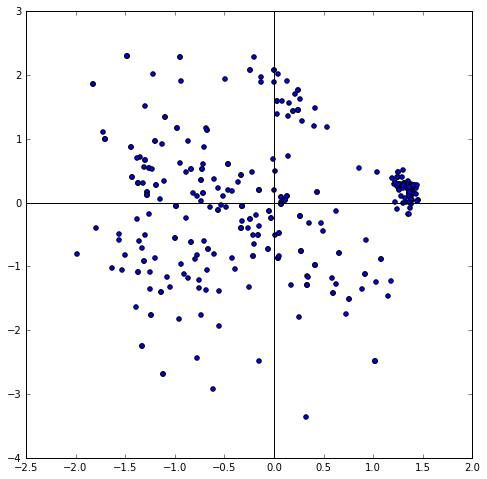

In [979]:
def sphering(data):
    my_mean = mean(data, axis = 0)
    mean_centered_data = (data - my_mean)
    S = cov(mean_centered_data.T)
    lmbda, U = eigh(S)
    lmbda[lmbda < 0] = 0
    W = dot(U, dot(diag(sqrt(lmbda)), U.T))
    assert allclose(dot(W, W), S)
    Winv = dot(U, dot(diag(1/sqrt(lmbda)), U.T))
    Z = dot(mean_centered_data, Winv)
    return Z 

sphere = sphering(X)
scatter(sphere[:,0], sphere[:, 1])

#-----------------------------------
# Plotting the centroid
axhline(y=mean(sphere[:, 1], axis = 0),  hold=None, color='black')
axvline(x=mean(sphere[:, 0], axis = 0),  hold=None, color='black')
print('Mean of the sphered data:')
print(mean(sphere, axis = 0))
print('Variance covariance matrix of the sphered data:')
print(cov(sphere.T))


><font size = "3">The mean and variance of the sphered data are zero and one respectively. Hence, it satisfies the properties of sphere data.</font>

Find the classification accuracy using the sphered data.

(1, 85.393258426966284)


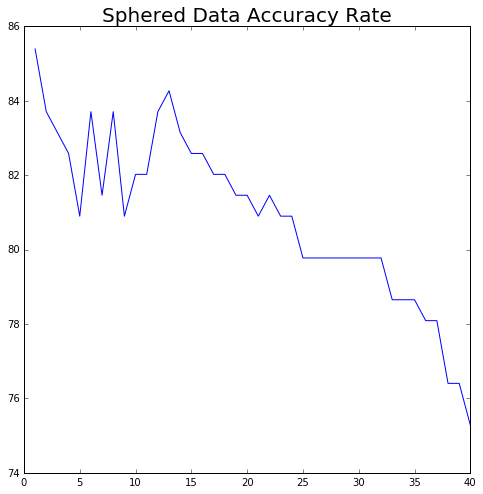

In [980]:
Str = sphere[Itr, :]
Ste = sphere[Ite, :]

plot(arange(1 ,41, 1), accuracyRate(Str, Ste, ttr, tte, 40))
title("Sphered Data Accuracy Rate", fontsize = 20)
print(optimalKnn(accuracyRate(Str, Ste, ttr, tte, 40)))


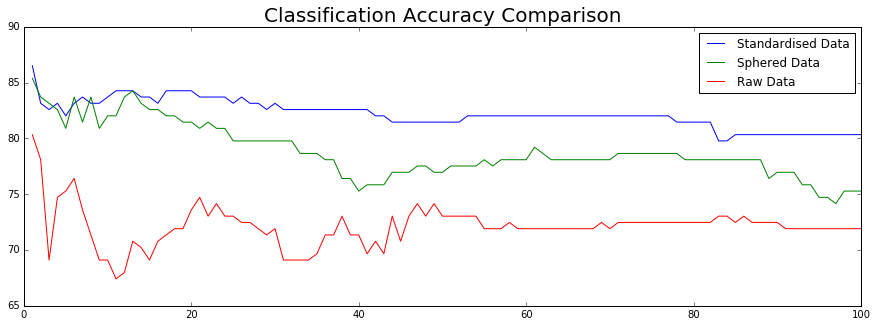

In [981]:
fig = figure(figsize=(15, 5))
ax1 = fig.add_subplot(111)
title('Classification Accuracy Comparison', fontsize = 20)


ax1.plot(arange(1 ,101, 1), accuracyRate(Xtr_st, Xte_st, ttr, tte, 100), label='Standardised Data')
ax1.plot(arange(1 ,101, 1), accuracyRate(Str, Ste, ttr, tte, 100), label='Sphered Data')
ax1.plot(arange(1 ,101, 1),accuracyRate(Xtr, Xte, ttr, tte, 100), label='Raw Data')
ax1.legend(loc=1)

><h2>Standardised Data Vs. Sphered Data Vs. Raw Data</h2>
><font size = "3">The maximum classification accuracy of the sphered data is usually better than the one of the standardised data. However, as K increases the accuracy appears to decrease faster for the sphered data. Nevertheless, both sphered data and standardised data perfom overall better than the raw data. Also for this data set the best results are achieved with low K´s between 1 and 3.  </font>

## Classifying digits

Here you'll use the k-nn classifier to distinguish between digits. You can load and plot a dataset of digit images as follows (keep executing the cell to see more digits)

(1797, 64)


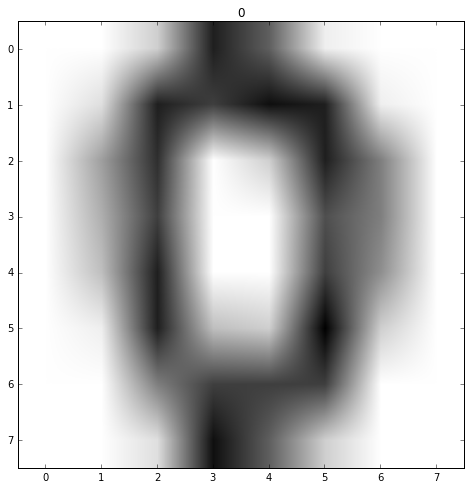

In [982]:
import sklearn.datasets
from numpy.random import randint
digits = sklearn.datasets.load_digits(n_class=10)
print(digits.data.shape)

# Pick a digit at random and plot it.  
# The title should be the number that is the digit from the target arrage
j = randint(digits.data.shape[0])
imshow(reshape(digits.data[j], (8,8)), cmap=cm.gray_r)
title("%d" % digits.target[j])

As you can see there are 1797 images arranged as 64-dimensional vectors. Choose two digits as the two classes that you'll use as the two classes and arrange them as a data and target matrix as follows.

In [983]:
mydigits = [4, 7]  # Choose your own!
I = np.logical_or(digits.target == mydigits[0], digits.target == mydigits[1])
X = digits.data[I,:]   # Features
# Make the targets 0 or 1 coresponding to the two classes
tmp = digits.target[I]
t = zeros(X.shape[0])
for i in (0,1):
    t[tmp == mydigits[i]] = i

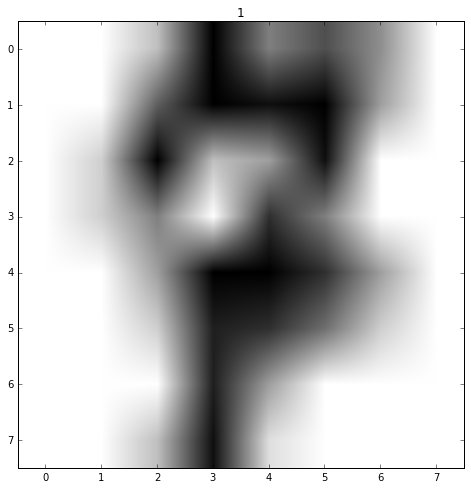

In [984]:
# Check the above: the title is now the class label, 0 or 1. 
# Re-execute to check that digits are labelled consistently
j = randint(len(t))
imshow(reshape(X[j], (8,8)), cmap=cm.gray_r)
title("%d" % t[j])

### k-nn classification

Now use your k-nn classifier to classify the image vectors.  What is the accuracy?   Note that here you should (a) split your data into training and testing data and (b) use cross validation on the training data to determine the best value of $k$ before finding the accuracy on the test data.  One reasonable way of proceeding would be to split the data into equal-sized training and test sets and then use 5 or 10 fold cross validation on the training set to determine $k$.

Do the misclassified images look like the other class?

/Users/Konsti/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:48: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
/Users/Konsti/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:74: DeprecationWarning: elementwise != comparison failed; this will raise an error in the future.


Optimal K: 1 Accuracy: 100%


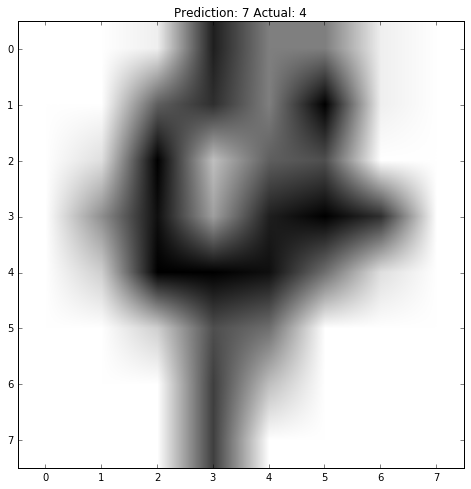

In [985]:
#-----------------------------------
# Helper Methods
# This method returns the missclassified data and data targets. 
def getMissclassified(prediction, target, data):
    miss_data = []
    miss_target = []
    for i in range(len(target)):
        if prediction[i] != target[i]:
            miss_data.append(i)
            miss_target.append(i) 
    
    return data[miss_data, :], target[miss_target]
            
# This cross validation method perfomse a nfold cross validation for a specified K value.    
def crossValidation(data, target, nfold, k):
    
    my_data = data
    miss_clf_data = []
    miss_clf_target = []
    
    my_targets = target
    my_accuracy = []
    mean_accur = 0
    # In order to create evenly distributed sample sizes accross the nfold corss validation, the lenth of the 
    # raw data needs to be adjusted for each nfold cross validation. The total length is simply devided by the 
    # nfold value and the remainder is subtracted from the total length of the data. 
    adjust = my_data.shape[0] % nfold
    V = delete(my_data,arange(adjust), 0)
    T = delete(my_targets,arange(adjust), 0)
    
    split_n = int(V.shape[0]/nfold)

    sample_d = np.split(V, nfold, 0)
    sample_t = np.split(T, nfold, 0)
    test = 0
    my_accuracy =[]
    
    # Run the cross validation n times. 
    for n in range(nfold): 
        Ctr = []
        Cte = []
        Ttr = []
        Tte = []
    # Create the training and test data sets. 
        for i in range(len(sample_d)): 
            # Seperating the test and training data. n indicates the current test data set. 
            if i != n:
                if Ctr == []:
                    Ctr = sample_d[i]
                    Ttr = sample_t[i]
                    
                else: 
                    Ctr = concatenate((Ctr, sample_d[i]), axis = 0)
                    Ttr = concatenate((Ttr, sample_t[i]), axis = 0)
                    
            else: 
                Cte =  sample_d[i]
                Tte =  sample_t[i]
                   
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(Ctr, Ttr)   # Train it
        
        y = knn.predict(Cte) 
        
        # Getting the missclassified digits and the classification accuracy. 
        
        accur = getAccuracy(y, Tte)  
        my_accuracy.append(accur)
        # Since it is possible that there are no missclassified digits, data is only passed into the list 
        # if the accuracy is below than 100%.
        if accur < 100: 
            x, tt = getMissclassified(y, Tte, Cte)
            
            if x != []:
                for i in range(len(x)):
                    miss_clf_data.append(x[i])
                    miss_clf_target.append([i])

        # Accumulating the accuracies for each each validation
        

    # We take the mean accuracy over nfold iterations.      
    mean_accur = mean(my_accuracy)
    
    return mean_accur, miss_clf_data , miss_clf_target
    #plot(my_accuracy)
    #title("Cross Validation")

# This method runs the corss validation method for each k that is to be tested.
def optimiseKnn(for_nK, data, target, nfold):
    
    miss_classified_d = []
    miss_classified_t = []
    k_results = []
    for k in range(1, for_nK +1):
        accur, mclf_d, mclf_t = crossValidation(data, target, nfold, k)
        k_results.append(accur)
        if mclf_d != []:
            for i in range(len(mclf_d)):
                miss_classified_d.append(mclf_d[i])
                miss_classified_t.append(mclf_t[i])
             
    index, value = max(enumerate(k_results), key=operator.itemgetter(1))
    showMissclassifications(miss_classified_d, miss_classified_t)
    print("Optimal K: %d Accuracy: %d%%" % (index +1, value))

# This method takes the misspecified data and visualises it. Showing the true and predicted class. 
def showMissclassifications(data, target):
    my_digits1 = []
    my_digits2 = []
    my_digits1_t = []
    my_digits2_t = []
    
    for i in range(len(target)):
        #Checking which class the miss specified number belongs to and count the occurence.
        if target[i][0] == 0: 
            my_digits1.append(data[i])
            my_digits1_t.append(target[i])
        else: 
            my_digits2.append(data[i])
            my_digits2_t.append(target[i])
    
    if len(my_digits1) == 0 & len(my_digits2) == 0:
        print("No missclassifications!")
    else:
        fig = figure()
        if len(my_digits1) >= len(my_digits2):
            ax1 = fig.add_subplot(111)
            title("Prediction: %d Actual: %d" % (mydigits[1], mydigits[0]))
            ax1.imshow(reshape(my_digits1[0], (8,8)), cmap=cm.gray_r)


        else:
            ax1 = fig.add_subplot(111)
            title("Prediction: %d Actual: %d" % (mydigits[0], mydigits[1]))
            imshow(reshape(my_digits2[0], (8,8)), cmap=cm.gray_r)


#-----------------------------------
# Main 

optimiseKnn(50, X, t, 10)


><h2>Cross Validation and Classifing Digits</h2>
><font size = "3">The ability of the Knn classifier to classify the digities is overall very accurate. Having tried every combination of the digits from 1 - 9, it is apparent that some digits are harder to classify than others. However, performing a cross validation where the average accuracy is taken instead of the individual, the accuracy is rarely below 100%. The above image shows a rare example of a missclasiffied 4 while the Knn has predicted this as a 7. This missclassification is acceptable as the image exhibits an ambigious shape. </font>